In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('C:/Users/kasaa/Downloads/datasets/Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=dataset.iloc[:, 3:13]
y=dataset.iloc[:, 13]

In [5]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#create dummy variables
geography = pd.get_dummies(X["Geography"],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [8]:
#concatinating dataframes
X=pd.concat([X,geography,gender],axis=1)


In [9]:
X=X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state =0)

In [13]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
#importing keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [23]:
#initializing ANN
classifier = Sequential()


In [30]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


In [35]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [36]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size = 10, epochs = 100,     verbose=1,
)

Epoch 1/100
536/536 [==============================] - 1s 959us/step - loss: 0.5984 - accuracy: 0.7322 - val_loss: 0.5365 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 0s 664us/step - loss: 0.5183 - accuracy: 0.7962 - val_loss: 0.5126 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 0s 707us/step - loss: 0.5021 - accuracy: 0.7962 - val_loss: 0.5002 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 0s 679us/step - loss: 0.4914 - accuracy: 0.7962 - val_loss: 0.4906 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 0s 722us/step - loss: 0.4814 - accuracy: 0.7962 - val_loss: 0.4810 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 0s 681us/step - loss: 0.4718 - accuracy: 0.7962 - val_loss: 0.4722 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 0s 684us/step - loss: 0.4627 - accuracy: 0.7964 - val_loss: 0.4646 - val_ac

In [37]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


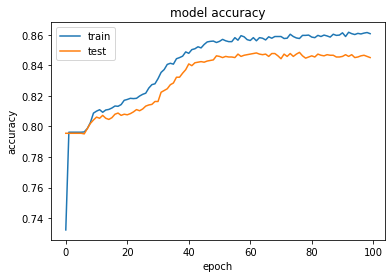

In [39]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()


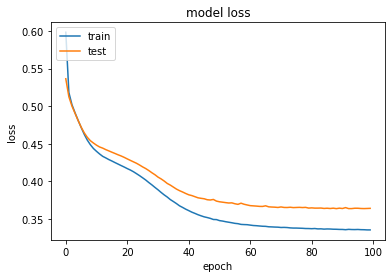

In [40]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [53]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [54]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
cm

array([[1523,   72],
       [ 217,  188]], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [58]:
score

0.8555